In [55]:

import pandas as pd

df = pd.read_excel ('/Users/ruwayda/Desktop/DataSetAI.xlsx')


dfTOP =  df[df['CATEGORY '] == 'Top']
listTOP = dfTOP.values.tolist()

dfBottom =  df[df['CATEGORY '] == 'BOTTOM ']
listBottom = dfBottom.values.tolist()

dfSHOES =  df[df['CATEGORY '] == 'SHOES ']
listSHOES = dfSHOES.values.tolist()

dfNECK =  df[df['CATEGORY '] == 'NECK']
listNECK = dfNECK.values.tolist()

dfHANDBAG =  df[df['CATEGORY '] == 'HANDBAG']
listHANDBAG = dfHANDBAG.values.tolist()



In [56]:
priceIN = input("Enter the price ");
priceIN=int(priceIN)


Enter the price 1000


In [57]:
Dcode = input("Enter the DRESS CODE casual ,sportswear ,Business and evening ");

Enter the DRESS CODE casual ,sportswear ,Business and evening sportswear


In [58]:
color = input("Enter the Color (bright) or (dark)");

Enter the Color (bright) or (dark)bright


In [142]:
# popularion generated 

import random 

population = []
POPULATION_SIZE = 30

def createcrom(listTOP,listBottom,listSHOES,listNECK,listHANDBAG):
    crom=[]
    crom.append(random.sample(listTOP, 1))
    crom.append(random.sample(listBottom, 1))
    crom.append(random.sample(listSHOES, 1))
    crom.append(random.sample(listNECK, 1))
    crom.append(random.sample(listHANDBAG, 1))

    
    return crom

for i in range(0, POPULATION_SIZE):
    population.append(createcrom(listTOP,listBottom,listSHOES,listNECK,listHANDBAG))

populationD = pd.DataFrame(population) 

In [143]:
#Roulette wheel selection
import random
def Roulette (fitnessArray , populationD ,POPULATION_SIZE):
    sum2=0 
    sumfit = sum(fitnessArray)
    rand= random.uniform(0,sumfit)
    i=0
    for i in range (0,POPULATION_SIZE ) :
        sum2 = sum2+ (fitnessArray[i])
        if rand < sum2 :
            return populationD.iloc[i]


In [144]:
def fitness(populationD, POPULATION_SIZE,color ,Dcode , priceIN ): 
    fitnessArray=[]; 
    
    for i in range (0,POPULATION_SIZE):
        color_count = 0;
        Dress_count = 0 ; 
        price = 0.0 ;
        for j in range (0,5):
            gen = populationD[j].iloc[i]
            Gcolor = gen[0][2]
            GDcode= gen[0][3]
            price=price+ gen[0][4]
            if Gcolor == color :
                color_count= color_count+1.0
          
            if GDcode == Dcode :
                Dress_count=Dress_count+1.0 
        if  price <=priceIN :
            total_price = (priceIN - price ) /priceIN
        else:
            total_price =0
        color_count= color_count/5
        Dress_count = Dress_count/5
     
        fitness = (0.4*total_price)+(0.4*Dress_count)+(0.2*color_count)
        fitnessArray.append( fitness)
    return fitnessArray
        

In [145]:
#crosover
import numpy as np
import random
def crosover (c1 , c2):
    new1 = c1 
    new2 = c2 
    
    # 5 is length of one cromosom
       
    
    randc= random.randint(1,4)

    new1= pd.concat([c1[0:randc],c2[randc:5]])
    new2=pd.concat([c2[0:randc] ,c1[randc:5]])


    return new1 , new2

    

In [146]:
def mutate(crom):
    crom1=crom
    
    index=-1
    global swapWith

    i= random.randint(0,4)
            
    if(i==0):
        swapWith = random.sample(listTOP, 1)
        index=i
            
    if(i==1):
        swapWith = random.sample(listBottom, 1)
        index=i
            
    if(i==2):
        swapWith = random.sample(listSHOES, 1)
        index=i
            
    if(i==3):
        swapWith = random.sample(listNECK, 1)
        index=i
            
    if(i==4):
        swapWith = random.sample(listHANDBAG, 1)
        index=i

    if (index != -1):
        crom1[index]=swapWith
    
    return crom1


In [147]:
# main function 

crosoverRate= 0.99
mutationRate= 0.001
generation=0
plotDF =[]
plotDF = pd.DataFrame(plotDF)
listOfGen=[]
listOfeve=[]
bestOutFit=[]
FittnessOutFit=0

#      Fitness for random population
fitness1 = fitness(populationD, POPULATION_SIZE,color ,Dcode , priceIN )

#      Set generation as 1000 
while (generation<1000): 
    
    new_population =[]
    new_population = pd.DataFrame(new_population)
    NewFitness=[]
    
    i=0
   
# crosover calling  
    for i in range (0,int(POPULATION_SIZE/2)):
        
        #      Roulette selection for select the parents 
        parent1 = Roulette(fitness1,populationD ,POPULATION_SIZE) 
        parent2 = Roulette(fitness1,populationD ,POPULATION_SIZE)
        
        #      Crossover part  
        if(random.random() < crosoverRate):
            parent1,parent2 = crosover(parent1,parent2)
            
        #      assign new chromosome to new population   
        new_population =new_population.append(parent1, ignore_index=True )
        new_population =new_population.append(parent2, ignore_index=True )
    
   #     mutattion
    for j in range (0,POPULATION_SIZE): 
        if(random.random() < mutationRate):
            new_population.iloc[j] = mutate(new_population.iloc[j])
            
    #     New Fitness for new population
    NewFitness = fitness(new_population, POPULATION_SIZE , color ,Dcode , priceIN )
    
    #     Finding the max fitness for the best outfit 
    MaxFitness= np.amax(NewFitness)
    #     Finding index max fitness for the best outfit in the new population
    index = NewFitness.index(MaxFitness)
    
    if FittnessOutFit < MaxFitness :
        bestOutFit = new_population.iloc[index]
        FittnessOutFit = MaxFitness
    
    #     Calculate the average Fitness for each generation 
    ave = (sum(NewFitness))/POPULATION_SIZE
    
    #     increment the number of generation 
    generation = generation + 1;
    
    #     assign all generation with its average to dataframe  
    listOfGeneration.append(generation)
    listOfaverage.append(ave)
    data = [[generation,ave]]
    populationD = new_population
    fitness1 = NewFitness
plotDF = pd.DataFrame({"generation":listOfGeneration, 
                    "Avrage":listOfaverage})


Fitness of the best outfit :
0.6800000000000002
-------
best outfit :


,16
0,"[[Top, t-shirt, bright, sportswear, 0]]"
1,"[[BOTTOM , sweatpants, bright, casual, 100]]"
2,"[[SHOES , flat, bright, casual, 0]]"
3,"[[NECK, choker, bright, casual, 0]]"
4,"[[HANDBAG, backpack, bright, sportswear, 100]]"


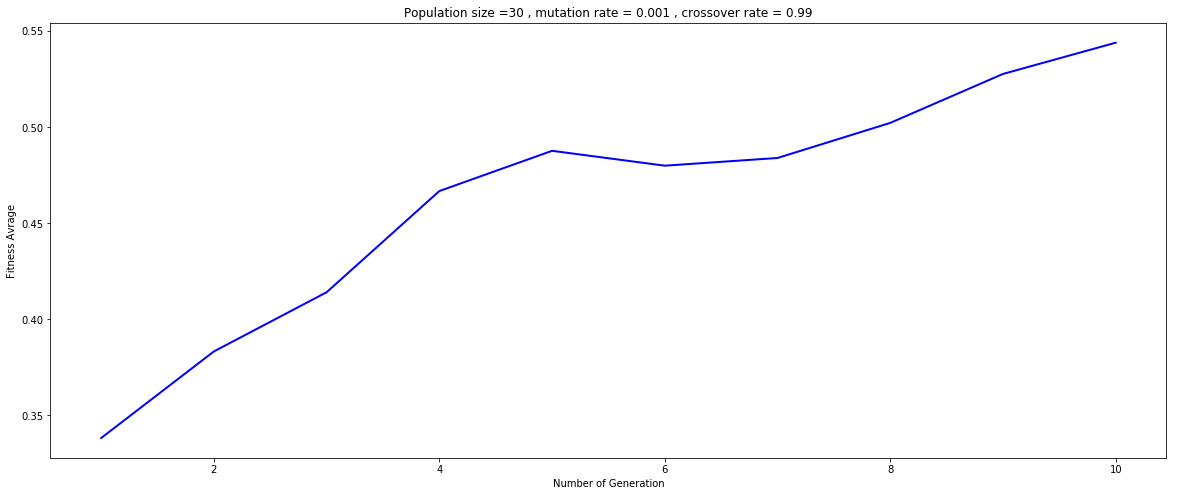

In [148]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("Number of Generation")
plt.ylabel("Fitness Avrage")
plt.title("Population size =30 , mutation rate = 0.001 , crossover rate = 0.99")
plt.plot( 'generation', 'Avrage', data=plotDF, color='blue', linewidth=2 )

bestOutFit = pd.DataFrame(bestOutFit) 
pd.set_option('display.max_colwidth', -1)
print("Fitness of the best outfit :")
print(FittnessOutFit)
print("-------")
print("best outfit :")
bestOutFit